In [174]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')

In [3]:
# Grab and process the raw data.
# data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
#              "master/sms_spam_collection/SMSSpamCollection"
#             )
# sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
# sms_raw.columns = ['spam', 'message']
# sms_raw.head()

amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon.columns = ['review', 'tone']
amazon.head()
amazon_neg = amazon

## First, we'll create a model based on positive reviews.

In [4]:
keywords = ['great', 'good', 'highly', 'love', 'like', 'nice', 'beautiful', 'brilliant', 'happy', 
            'excellent', 'perfect', 'would recommend', 'five star', 'well']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
#    amazon[str(key)] = amazon.review.str.contains(' ' + str(key) + ' ', case=False)
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)
amazon.head()

,review,tone,great,good,highly,love,like,nice,beautiful,brilliant,happy,excellent,perfect,would recommend,five star,well
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
amazon['review'] = amazon['review'].str.lower()
amazon.head()

,review,tone,great,good,highly,love,like,nice,beautiful,brilliant,happy,excellent,perfect,would recommend,five star,well
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",1,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [145]:
# Looking at frequency of words used in positive and negative reviews
positive = amazon.loc[amazon['tone'] == 1]
negative = amazon.loc[amazon['tone'] == 0]

positive_words = pd.Series(np.concatenate([x.split() for x in positive.review])).value_counts()
positive_words = positive_words.drop(['but', 'on', 'it', 'in', 'so', 'are', 'the', 'and', 'i', 'is', 'a', 
                                      'to', 'it', 'this', 'my', 'for', 'with', 'of', 'it', 'was', 'have',
                                     'that', 'has', 'as', 'you', 'than', 'if', 'your', 'at', 'be', 'all', 'had'])
top_pos = positive_words.iloc[:20]
print('Top positive words: \n', top_pos)

negative_words = pd.Series(np.concatenate([x.split() for x in negative.review])).value_counts()
negative_words = negative_words.drop(['but', 'on', 'it', 'in', 'so', 'are', 'the', 'and', 'i', 'is', 'a', 
                                      'to', 'it', 'this', 'my', 'for', 'with', 'of', 'it', 'was', 'have',
                                    'that', 'has', 'as', 'you', 'than', 'if', 'your', 'at', 'be', 'all', 'had'])
top_neg = negative_words.iloc[:20]
print('\n Top negative words: \n', top_neg)
# sns.hist(top_pos)
# plt.title('Most Frequently Used Words in Positive Reviews')
# plt.ylabel('Number of Appearances')

Top positive words: 
 very         69
great        62
phone        57
good         53
works        43
headset      24
one          22
sound        22
quality      21
battery      20
love         20
phone.       20
excellent    20
nice         19
best         19
i've         19
like         18
recommend    18
well         17
it's         16
dtype: int64

 Top negative words: 
 not        101
phone       61
very        33
don't       23
after       21
battery     19
it.         18
from        17
only        17
does        16
would       16
or          15
out         15
do          15
then        15
work        15
when        15
no          14
me          14
doesn't     14
dtype: int64


In [146]:
amazon['tone'] = (amazon['tone'] == 1) # turns tone into a boolean column
# Note that if you run this cell a second time everything will become false.
# So... Don't.
amazon.head()

,review,tone,great,good,highly,love,like,nice,beautiful,brilliant,happy,excellent,perfect,would recommend,five star,well
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,great for the jawbone.,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


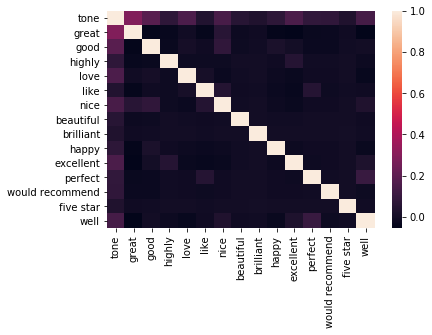

In [147]:
sns.heatmap(amazon.corr())

In [148]:
data = amazon[keywords]
target = amazon['tone']
print(data.head())
target.head()

   great   good  highly   love   like   nice  beautiful  brilliant  happy  \
0  False  False   False  False  False  False      False      False  False   
1  False   True   False  False  False  False      False      False  False   
2   True  False   False  False  False  False      False      False  False   
3  False  False   False  False  False  False      False      False  False   
4   True  False   False  False  False  False      False      False  False   

   excellent  perfect  would recommend  five star   well  
0      False    False            False      False  False  
1       True    False            False      False  False  
2      False    False            False      False  False  
3      False    False            False      False  False  
4      False    False            False      False  False  


0    False
1     True
2     True
3    False
4     True
Name: tone, dtype: bool

In [149]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 264


## Now we'll create a model based on negative reviews.

In [5]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon.columns = ['review', 'tone']

keywords = ['not', 'worst', 'horrible', 'poor', 'never', 'waste', 'useless', 'terrible', 'awful', 'bad', 'return',
           'cheap', 'don\'t', 'beware', 'sucks', 'disappoint', 'displease', 'not recommend', 'junk', 'broke',
           'no', 'don\'t', 'doesn\'t']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
#    amazon[str(key)] = amazon.review.str.contains(' ' + str(key) + ' ', case=False)
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)
amazon.head()

,review,tone,not,worst,horrible,poor,never,waste,useless,terrible,...,don't,beware,sucks,disappoint,displease,not recommend,junk,broke,no,doesn't
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
amazon['tone'] = (amazon['tone'] == 0) # turns tone into a boolean column
# Note that if you run this cell a second time everything will become false.
# So... Don't.
amazon.head()

,review,tone,not,worst,horrible,poor,never,waste,useless,terrible,...,don't,beware,sucks,disappoint,displease,not recommend,junk,broke,no,doesn't
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


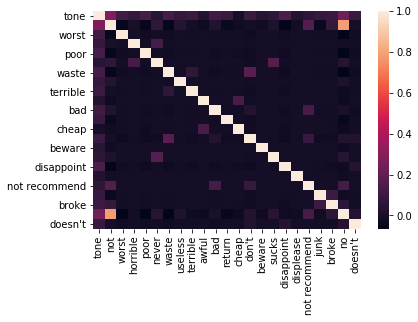

In [7]:
sns.heatmap(amazon.corr())

Our variables/features appear to be quite independent from one another.

In [8]:
data = amazon[keywords]
target = amazon['tone']
print(data.head())
target.head()

     not  worst  horrible   poor  never  waste  useless  terrible  awful  \
0  False  False     False  False  False  False    False     False  False   
1  False  False     False  False  False  False    False     False  False   
2  False  False     False  False  False  False    False     False  False   
3  False  False     False  False  False  False    False     False  False   
4  False  False     False  False  False  False    False     False  False   

     bad  ...  beware  sucks  disappoint  displease  not recommend   junk  \
0  False  ...   False  False       False      False          False  False   
1  False  ...   False  False       False      False          False  False   
2  False  ...   False  False       False      False          False  False   
3  False  ...   False  False       False      False          False  False   
4  False  ...   False  False       False      False          False  False   

   broke     no  don't  doesn't  
0  False   True  False    False  
1  False  Fa

0     True
1    False
2    False
3     True
4    False
Name: tone, dtype: bool

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 268


I created two models, one for positive reviews and one for negative, for this data. I created both models using keywords that were present in the reviews - I'd love to add features other than keywords, but was not able to think of any. 